#**Exponential smoothing**



##  install these libraries using pip:



In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt

## Loading dataset

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
# data = pd.read_csv('/content/drive/MyDrive/T5 Bootcamp/Dataset/week_5/Copy of traffic.csv')
data = pd.read_csv('/content/drive/MyDrive/T5 Bootcamp/Dataset/week_5/Copy of traffic.csv', parse_dates=['DateTime'], index_col='DateTime')
data

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041
...,...,...,...
2017-06-30 19:00:00,4,11,20170630194
2017-06-30 20:00:00,4,30,20170630204
2017-06-30 21:00:00,4,16,20170630214


In [176]:
df = data['Vehicles']
df

,Vehicles
DateTime,
2015-11-01 00:00:00,15
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9
...,...
2017-06-30 19:00:00,11
2017-06-30 20:00:00,30
2017-06-30 21:00:00,16


In [179]:
mydata = df.iloc[:5000]

## Visualizing the data





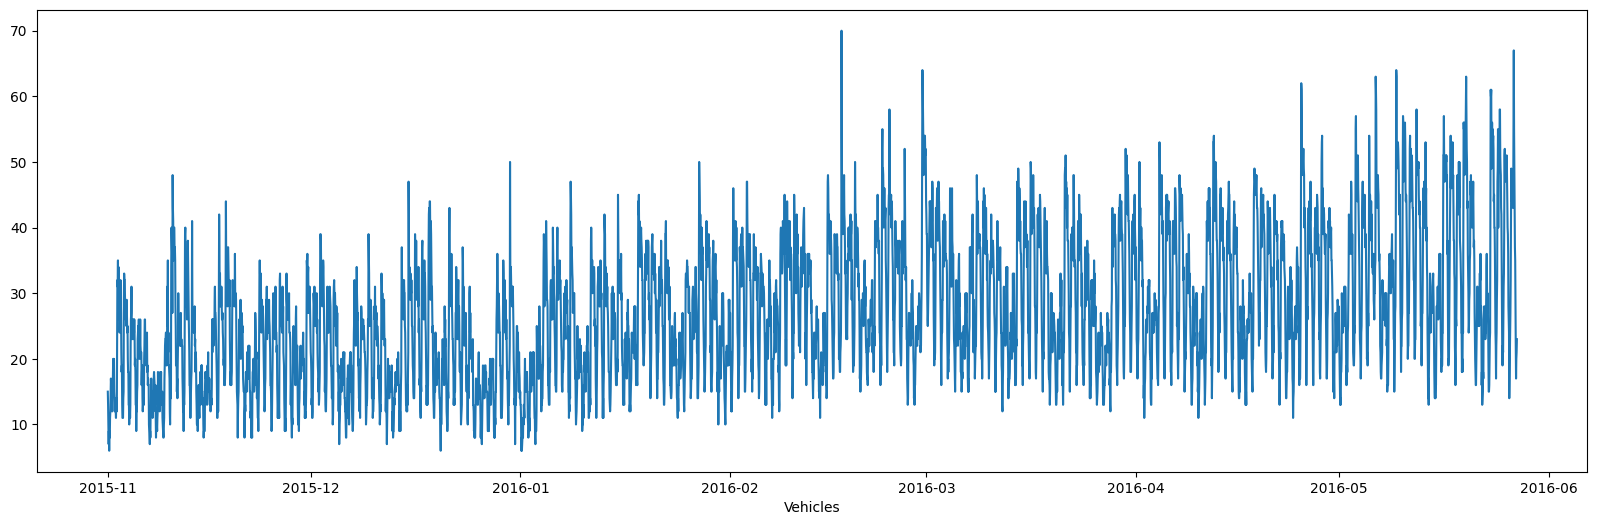

In [180]:
plt.figure(figsize=(20,6))
plt.plot(mydata)
plt.xlabel('Vehicles')
plt.show()

#**Single Exponential smoothing**





In [181]:
model = SimpleExpSmoothing(mydata)
model_single_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions





In [182]:
forecast_single = model_single_fit.forecast(6)
forecast_single

,0
2016-05-27 08:00:00,23.0
2016-05-27 09:00:00,23.0
2016-05-27 10:00:00,23.0
2016-05-27 11:00:00,23.0
2016-05-27 12:00:00,23.0
2016-05-27 13:00:00,23.0


## Visualize Single Exponential Smoothing




In [188]:
forecast_single = model_single_fit.forecast(200)

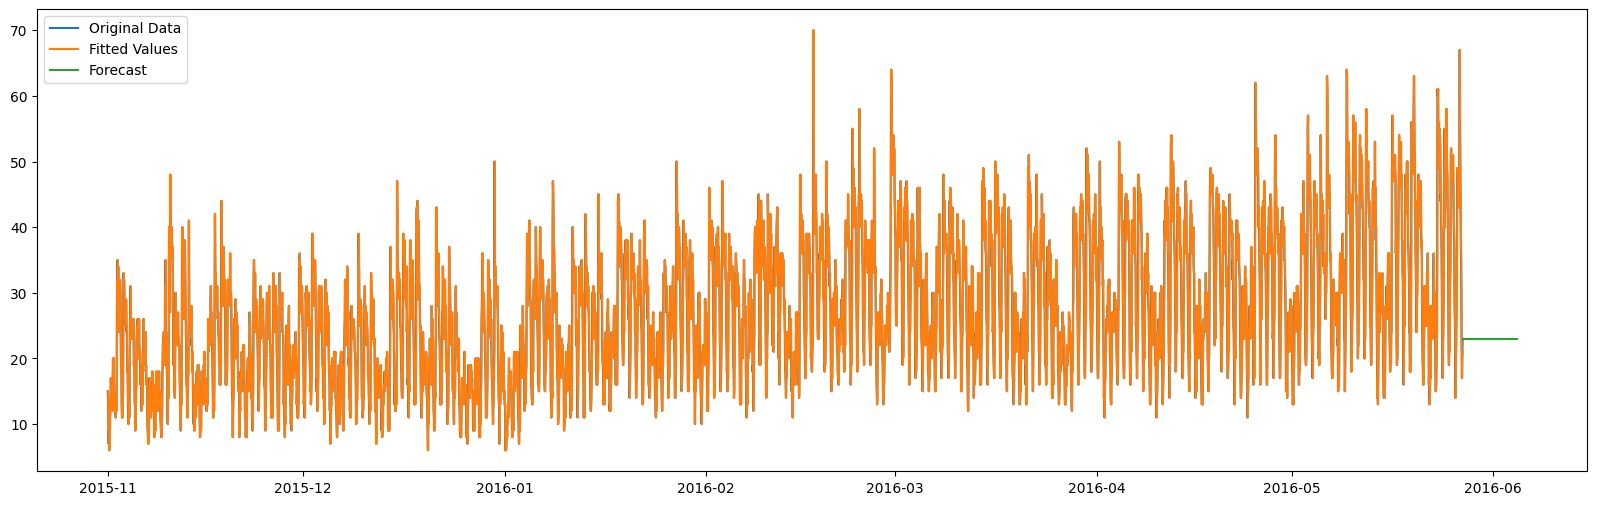

In [189]:
plt.figure(figsize=(20,6))
plt.plot(mydata, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_single, label='Forecast')
plt.legend()
plt.show()

#**Double Exponential Smoothing**




In [190]:
model_double = Holt(mydata)
model_double_fit = model_double.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [192]:
forecast_double = model_double_fit.forecast(6)
forecast_double

,0
2016-05-27 08:00:00,22.682075
2016-05-27 09:00:00,22.374787
2016-05-27 10:00:00,22.067500
2016-05-27 11:00:00,21.760212
2016-05-27 12:00:00,21.452924
2016-05-27 13:00:00,21.145637


## Visualize Double Exponential Smoothing




In [205]:
forecast_double = model_double_fit.forecast(40)

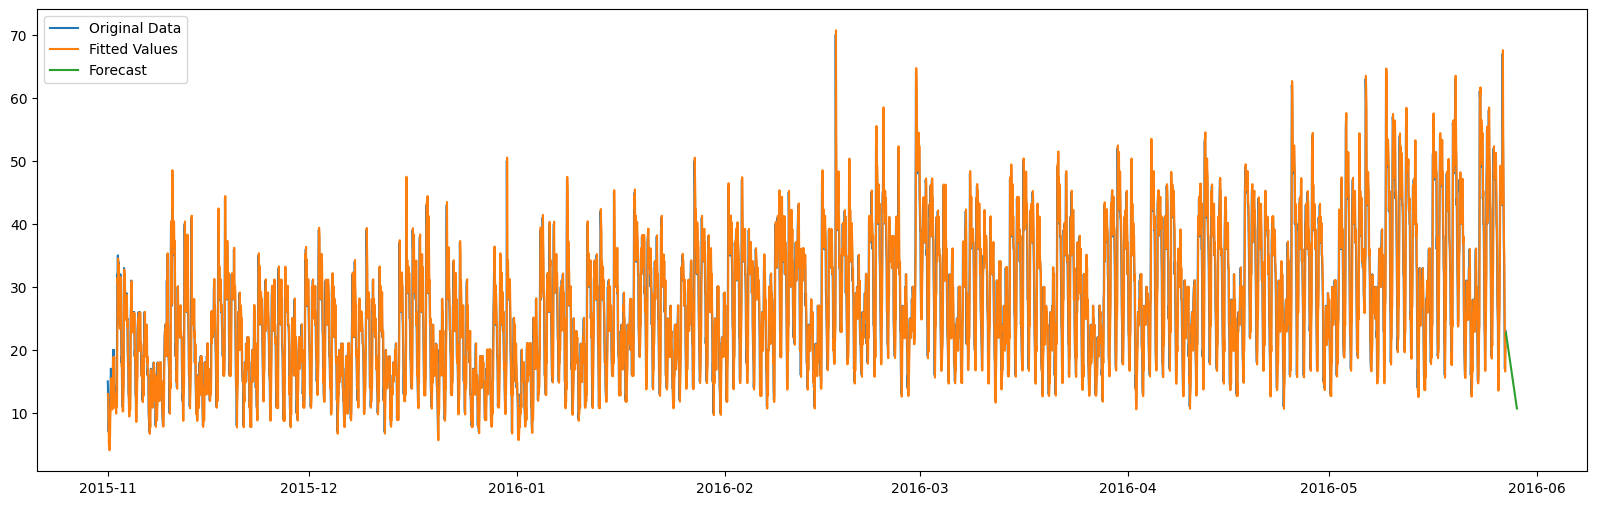

In [206]:
plt.figure(figsize=(20,6))
plt.plot(mydata, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double, label='Forecast')
plt.legend()
plt.show()

#**Holt-Winter’s Seasonal Smoothing**






In [199]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    mydata, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [200]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)

2016-05-27 08:00:00    22.777321
2016-05-27 09:00:00    24.311888
2016-05-27 10:00:00    28.355121
2016-05-27 11:00:00    29.164572
2016-05-27 12:00:00    27.859750
2016-05-27 13:00:00    23.236481
Freq: H, dtype: float64


## Visualize Triple Exponential Smoothing




In [203]:
forecast_triple = model_triple_fit.forecast(100)

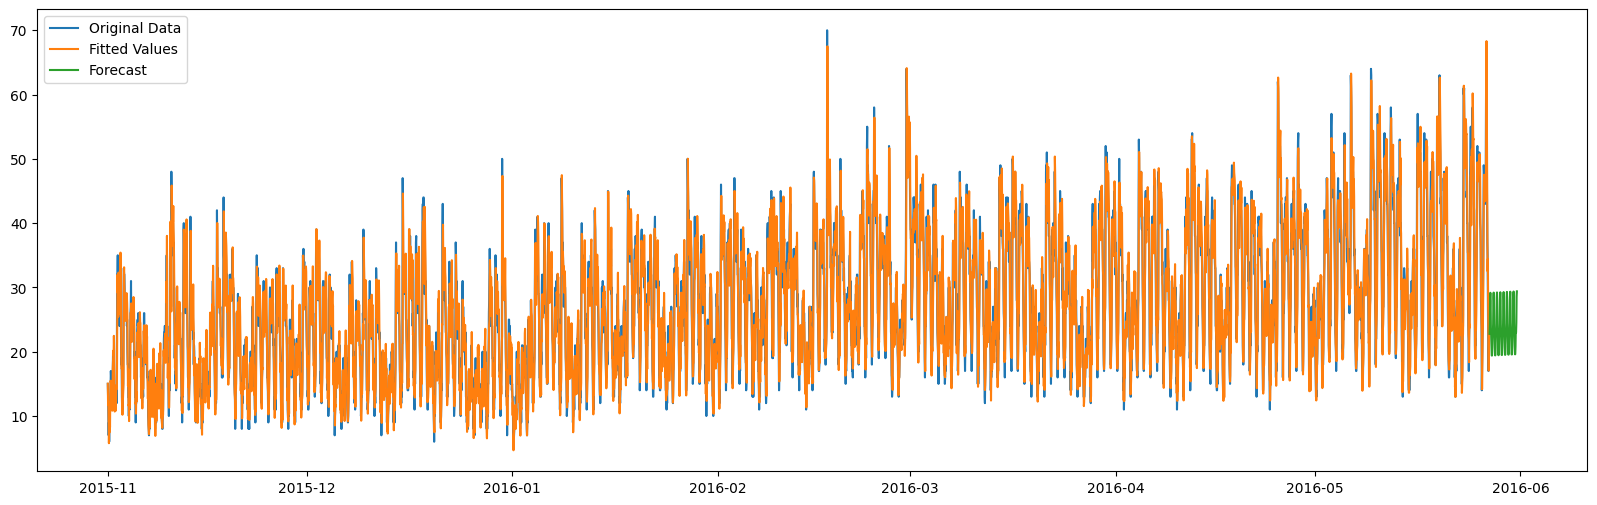

In [204]:
plt.figure(figsize=(20,6))
plt.plot(mydata, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.legend()
plt.show()

##**Well done :)**